In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('data_abdec.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_abdec.csv'

In [60]:
data

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,y_mean_neck_6,z_mean_neck_6,norm_neck_6,x_mean_neck_6.1,y_mean_neck_6.1,z_mean_neck_6.1,norm_neck_6.1,PWR_6,HR_6,label
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.6,-0.8,-0.572498,-0.2,0.6,-0.2,-0.365915,2244433,-4.768670,0
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.6,-0.8,0.159211,1.8,0.4,-3.2,0.618757,735291,-1.590027,0
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.4,0.6,0.728247,0.4,-0.8,0.2,0.586656,133009,1.775299,0
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.2,-0.8,0.754322,-0.6,1.4,1.0,-0.514049,-505995,6.401017,0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.2,-0.2,-1.147313,2.0,0.0,-4.6,0.492658,-1499327,4.667405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.000006,0.000003,0.000012,0.000005,0.00002,0.000009,0.000027,0.000009,0.000002,0.000014,...,0.4,0.8,0.675306,0.2,0.0,0.4,0.194662,-287,-2.919228,0
1451,0.000006,0.000002,0.000012,0.000005,0.00002,0.000010,0.000028,0.000009,0.000002,0.000013,...,-0.2,-0.6,-0.154262,0.2,0.4,0.0,0.095863,51252,0.217588,0
1452,0.000006,0.000002,0.000012,0.000005,0.00002,0.000010,0.000028,0.000009,0.000002,0.000014,...,0.0,0.0,0.000000,-0.4,0.6,0.2,-0.533048,10012,1.368796,0
1453,0.000006,0.000002,0.000012,0.000005,0.00002,0.000010,0.000028,0.000009,0.000002,0.000014,...,0.2,0.4,0.427141,0.2,0.0,-0.4,0.193923,-13341,2.815516,0


In [61]:
X = data.drop(['label'],axis=1)
y = data['label']

In [62]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.2, shuffle=False , random_state=0)

In [63]:
(X_train_true, X_vali, y_train_true, y_vali) = train_test_split(X_train, y_train, test_size=0.25, shuffle=False, random_state=0)

In [64]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [65]:
params = {
    'n_estimators':[10, 15, 20, 100, 200 , 300, 500, 1000],
    'max_depth':[16, 32, 64, 100, 200],
    'min_samples_leaf':[8,16, 24, 48, 96, 192],
    'min_samples_split':[8,16,20, 40, 60, 90, 180]
}

In [66]:
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train_true, y_train_true)

print('最適ハイパーパラメータ :',grid_cv.best_params_)
print('最適精度 :',grid_cv.best_score_)

最適ハイパーパラメータ : {'max_depth': 32, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 200}
最適精度 : 0.3848797250859106


In [67]:
estimator = grid_cv.best_estimator_

In [68]:
pred = estimator.predict(X_vali)
print('検証精度:{0:.4f}'.format(accuracy_score(y_vali,pred)))

検証精度:0.4467


In [69]:
rf1 = estimator
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_leaf=8, min_samples_split=20,
                       n_estimators=200, n_jobs=-1, random_state=0)

In [70]:
pred1 = rf1.predict(X_test)
print('精度:{0:.4f}'.format(accuracy_score(y_test,pred1)))

精度:0.3127


In [71]:
# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],rf1.feature_importances_[i])


abnormal_x_arm 0.03134448011373025
abnormal_y_arm 0.029652727115134968
abnormal_z_arm 0.03837960498143546
abnormal_norm_arm 0.020476806016659736
abnormal_x_neck 0.028835756093675
abnormal_y_neck 0.03302671163434722
abnormal_z_neck 0.025839960095587023
abnormal_norm_neck 0.02290391095897183
abnormal_x_waist 0.021253401448354668
abnormal_y_waist 0.04247122295025773
abnormal_z_waist 0.03237438200514982
abnormal_norm_waist 0.01872896870641165
abnormal_PWR 0.029590627814897904
abnormal_HR 0.036844376049816746
x_mean_arm 0.010159477739282954
y_mean_arm 0.007494281074986973
z_mean_arm 0.008408033539281856
norm_arm 0.006735767992342264
x_mean_neck 0.009230473518517503
y_mean_neck 0.011568648243459182
z_mean_neck 0.009933096639060383
norm_neck 0.007571066331345031
x_mean_waist 0.005109720446003071
y_mean_waist 0.00965043872614079
z_mean_waist 0.007456891120375456
norm_waist 0.010619098163495903
PWR 0.009929056225322941
HR 0.018035610585750202
x_mean_arm_1 0.0036661368384338644
y_mean_arm_1 0.00

In [73]:
import sys
import time

program_start = time.time()
now = str(int(program_start))

df = pd.DataFrame(rf1.feature_importances_)
df.to_csv("feature_importances"+ now +".csv")

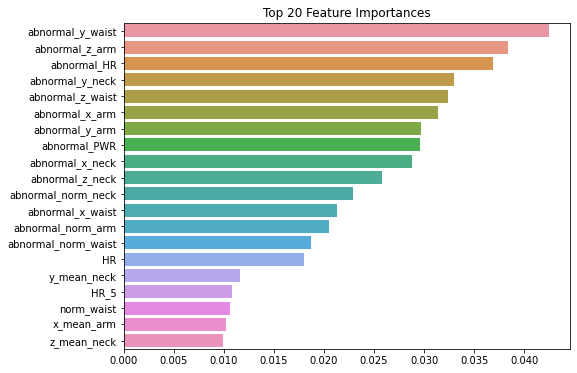

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

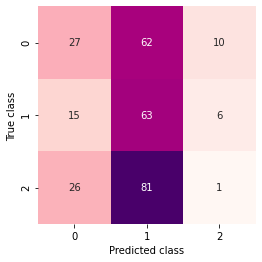

In [75]:
# 混同行列を作成
matrix = confusion_matrix(y_test, pred1)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [76]:
data1 = pd.read_csv("data.csv")

X1 = data.drop(['label'],axis=1)
y1 = data['label']

(X1_train, X1_test, y1_train, y1_test) = train_test_split(X,y,test_size=0.2, shuffle=False , random_state=0)
rf1.fit(X1_train, y1_train)

pred2 = rf1.predict(X1_test)
print('精度:{0:.4f}'.format(accuracy_score(y1_test,pred2)))

精度:0.3127
